# <center> 5.Individuālais uzdevums/ 6.Praktiskā nodarbība <br><br> "Attēlu pārklāšanās režīmi un pārejas efekti"

#### Nodarbībā tiks apskatīti:
- Pārklāšanās režīmi
- Individuālā uzdevuma izklāsts

In [7]:
### Python pakotņu importēšana
#====================================
#darbībam ar masīviem
import numpy as np
from numpy import asarray

#attēlu apstrādei
import cv2
from PIL import Image

#atvērt/parādīt attēlus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
#Attēlu krāsu sistēmas un attēla izmēra maiņa  
#====================================

#atvērt attēlu
image_A = cv2.imread('cat.jpg')
image_B = cv2.imread('sun.jpg')

#mainīt no BGR uz RGB nolasi dēļ OpenCV 
im_rgb_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
im_rgb_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

#Mērogot attēlus, lai tie būtu vienāda izmēra
resized_img_A = cv2.resize(image_A, (500,500))
resized_img_B = cv2.resize(image_B, (500,500))

#Saglabāt mērogotos attēlus
cv2.imwrite('cat.jpg', resized_img_A)
cv2.imwrite('sun.jpg', resized_img_B)

True

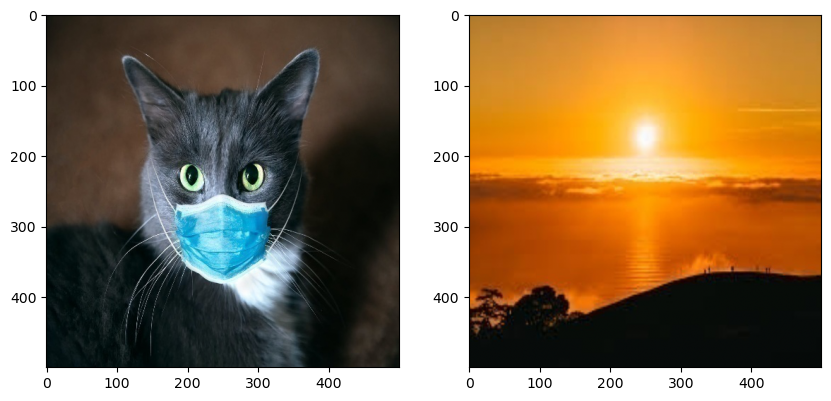

In [9]:
#Read the image data as an array + normalize the values
#====================================

# atvērt attēlu
image_A = Image.open('cat.jpg')
image_B = Image.open('sun.jpg')

# pārveidot attēlu par numpy masīvu
data_A = asarray(image_A)
data_B = asarray(image_B)

# izveidot Pillow attēlu no ievades datiem
image_array_A = Image.fromarray(data_A)
image_array_B = Image.fromarray(data_B)

#normalizēt datu vērtības robežā no 0 līdz 1
image_norm_A = data_A/255.0
image_norm_B = data_B/255.0

#parādīt atvērtos attēlus
fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image_norm_B)

d: 1


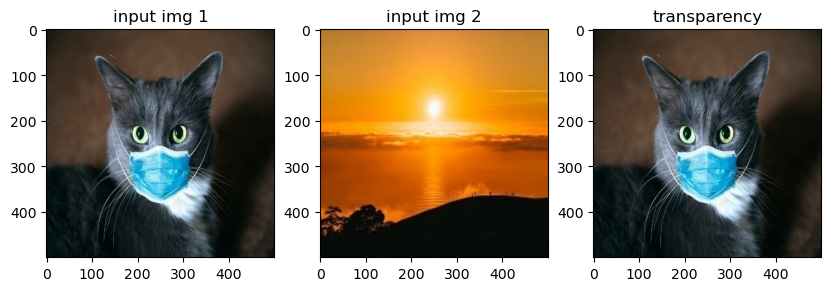

In [17]:
#Caurspīdīguma efekts (Transparency/Opacity)
#====================================
# C = d * A + (1-d) * B
#d-slāņa caurspīdīgums no 0 līdz 1
#A-priekšplāna attēls
#B-fona attels
#C-rezultats
#====================================

d = float(input("d: "))
transparency = d * image_norm_A + (1-d) * image_norm_B

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('input img 1')
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('input img 2')
ax2.imshow(image_norm_B)
ax3 = fig.add_subplot(1,3,3)
ax3.title.set_text('transparency')
ax3.imshow(transparency)

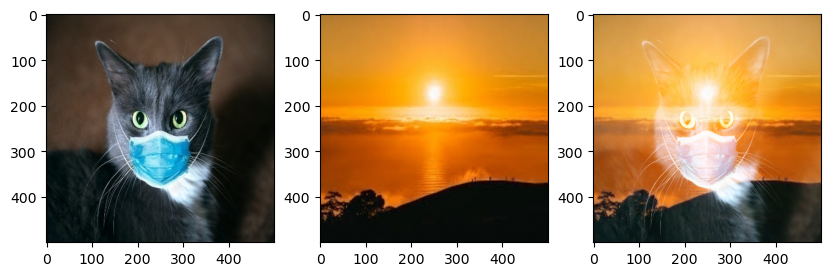

In [12]:
#Izsijāšanas, filtrēšanas režīms (Screen)
#====================================
# C = 1 - (1-A) * (1-B)
#====================================

screen = 1 - (1-image_norm_A) * (1-image_norm_B)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(screen)

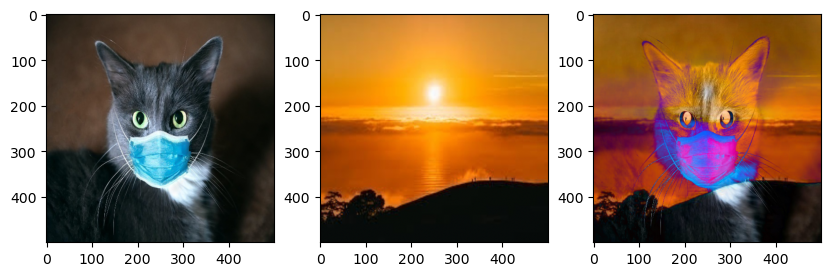

In [18]:
#Starpības režīms (Difference)
#====================================
# C = abs(A-B)
#====================================

difference = abs(image_norm_A - image_norm_B)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(difference)

<ipython-input-29-1d4a4fae3d94>:6: RuntimeWarning: divide by zero encountered in true_divide
  burn = 1-((1-image_norm_B)/image_norm_A)
<ipython-input-29-1d4a4fae3d94>:6: RuntimeWarning: invalid value encountered in true_divide
  burn = 1-((1-image_norm_B)/image_norm_A)


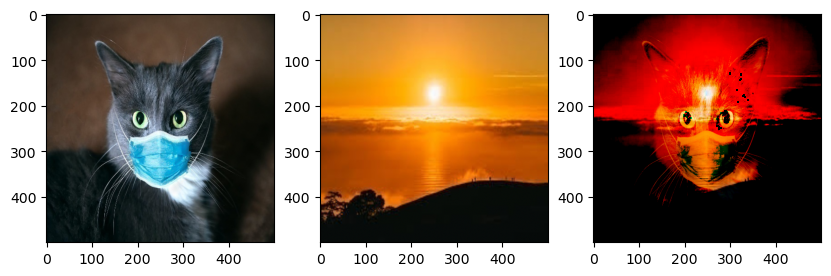

In [29]:
#Iededzinasana
#====================================
# C = 1-((1-B)/A)
#====================================

burn = 1-((1-image_norm_B)/image_norm_A)
burn = np.clip(burn, 0, 1)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(burn)

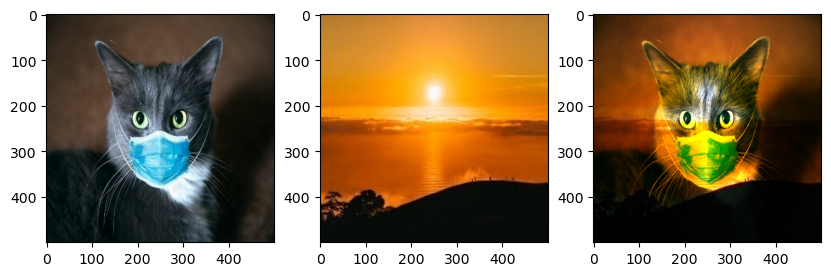

In [28]:
#Pārklājuma režīms (Overlay)
#====================================
#if B<= 0.5 then C=2*A*B
#if B > 0.5 then C=1-2 * (1-A) * (1-B)

overlay = np.where(image_norm_B <= 0.5, 2 * image_norm_A * image_norm_B, 1-2 * (1-image_norm_A) * (1-image_norm_B))
overlay = np.clip(overlay, 0, 1)

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image_norm_A)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_norm_B)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(overlay)

----

## <center> 5.Individuālais uzdevums
    
Realizēt 2 dažādus attēlu pārklāšanās režīmus (piemēram, "Mīkstas gaismas režīmu" un "Iededzināšanas režīmu") balstoties uz Jūsu studentu apliecības numura pēdējiem 3 cipariem. Variantu saraksts pieejams ORTUS vidē pie 7.praktiskās nodarbības apraksta. 
<br>
<br>
Piemēram, ja Jūsu studentu apliecības numurs ir 200RDB154, tad nepieciešams pildīt 154.variantu un realizēt sekojošos attēlu pārklāšanās režīmus
<br>
   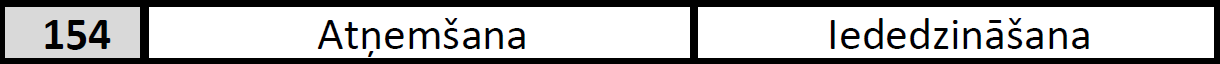
<br>
<br>
Uzdevuma izpildes izvadei jāsastāv no abiem brīvi izvēlētiem ievades attēliem un realizētā pārklāšanās režīma rezultāta. <br> 
Katra pārklāšanās režīma izvade sastāv no 3 attēliem : <i> attels_1, attels_2, rezultats</i>